# Salary Prediction System

### Importing the necessary modules

In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #Import train_test_split from sklearn.model_selection module 
from sklearn.linear_model import LinearRegression #Import LinearRegression from sklearn.linear_model
from sklearn.metrics import r2_score #Import the r2_score function from sklearn.metrics module 

### Welcome function to the salary prediction system

In [2]:
def welcome():
    print("Welcome to salary prediction system")
    print("Press ENTER KEY to proceed")
    input()

### Checkcsv function to check the files

In [3]:
def checkcsv():
    csv_files = []
    cur_dir = os.getcwd()
    content_list = os.listdir(cur_dir)
    for x in content_list:
        if x.split(".")[-1] == 'csv':
            csv_files.append(x)
        
    if len(csv_files) == 0:
        return "No CSV files in the directory"
    else:
        return csv_files

### Function to check & select the csv files

In [4]:
def display_and_select_csv (csv_files):
    i = 0
    for file_name in csv_files:
        print(i,"...", file_name)
        i +=1
    return csv_files[eval(input("select file to create ML Model" ))] #selecting the file from all the available files to create ML Model

### Necessary graph function for the Linear Regression Model

In [5]:
def graph(X_train, Y_train, regressionObject, X_test, Y_test, Y_pred): #function to create a linear regression graph consisting of all the necessarry attributes
    plt.scatter(X_train, Y_train, color = "red", label= "training data") #training data graph to plot X_train vs Y_train 
    plt.plot(X_train, regressionObject.predict(X_train), color = "blue", label = "Best fit") #Best fit graph to plot X_train vs regressionObject.predict(X_train)
    plt.scatter(X_test, Y_test, color = "green", label = "test data") #test data graph to plot X_test vs Y_test 
    plt.scatter(X_test, Y_pred, color = "black", label = "Pred test data")  #Pred test data graph to plot X_test vs Y_pred 
    plt.title("Salary vs Experience") #title of the graph as Salary vs Experience
    plt.xlabel("Years of Experience") #labeling the x axis as Years of Experience
    plt.ylabel("Salary") #labeling the y axis as Salary
    plt.legend() #shows all the labels like training data, Best fit, test data, Pred test data
    plt.show() #display the figure

## Usage Example

Welcome to salary prediction system
Press ENTER KEY to proceed

0 ... attachment_Salary-Data_lyst5512 (1).csv
select file to create ML Model0
attachment_Salary-Data_lyst5512 (1).csv is selected
Reading csv file
Creating Dataset
Dataset Created
Enter test data (between 0 & 1)0.2
Model created in progression
Model is created
Press ENTER key to predict test data in trained model

[[10.3]
 [ 4.9]
 [ 7.1]
 [ 9. ]
 [ 1.5]
 [ 4. ]]   ... [122391  67938  98273 105582  37731  55794]   ... [123624.09715309  72718.59481729  93457.87354669 111369.06881299
  40666.98223549  64234.34442799]
[10.3] ... 122391 ... 123624.09715309292
press ENTER key to see above graphical format



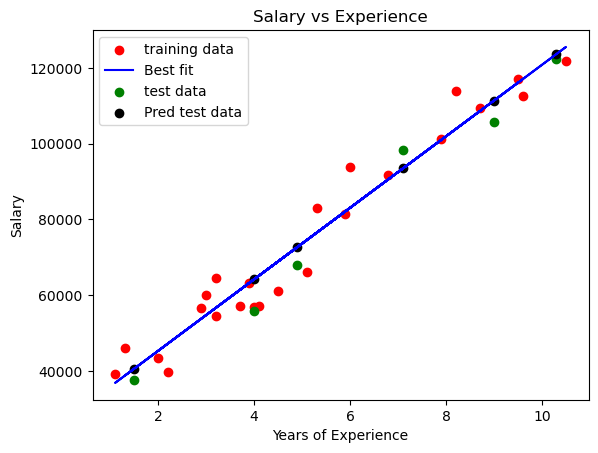

our model is 96.96% accurate
Now you can predict salary of an employee using our model

Enter experience in years of the candidates, seperated by comma
2,3,4,10


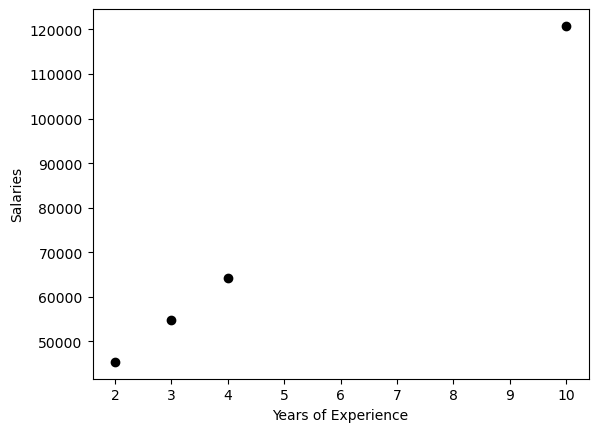

   Experience       Salaries
0         2.0   45380.454674
1         3.0   54807.399551
2         4.0   64234.344428
3        10.0  120796.013690
Do you want to continue? (Y/N): y
[4.9] ... 67938 ... 72718.59481729163
press ENTER key to see above graphical format



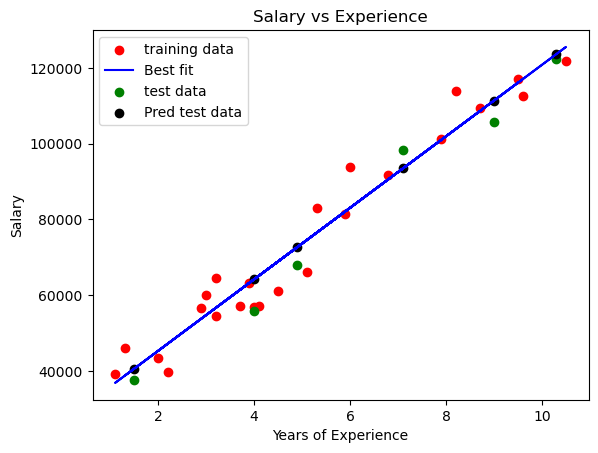

our model is 96.96% accurate
Now you can predict salary of an employee using our model

Enter experience in years of the candidates, seperated by comma
4,9.6


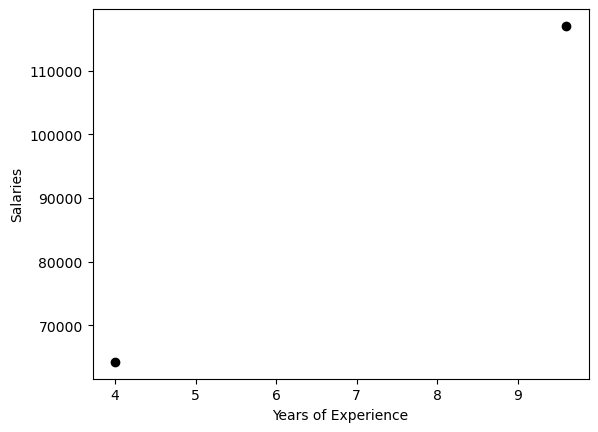

   Experience       Salaries
0         4.0   64234.344428
1         9.6  117025.235739
Do you want to continue? (Y/N): n
Press ENTER key if you want to exit the model
Thank you for using the model



In [8]:
def main():
    welcome()
    try:
        # Checking and selecting CSV files
        
        csv_files = checkcsv()
        if csv_files == "No csv files in the directory":
            raise FileNotFoundError("No csv files in the directory")
        csv_files = display_and_select_csv(csv_files)
        print(csv_files, "is selected")
        print("Reading csv file")
        print("Creating Dataset")
        dataset = pd.read_csv(csv_files)
        print("Dataset Created")
        X = dataset.iloc[:,:-1].values #Extracting features from the dataset
        Y = dataset.iloc[:,-1].values #Extracting labels from the dataset
        s = float(input("Enter test data (between 0 & 1)")) #Test data split ratio
        X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size=s) #Splitting the dataset into training and testing sets
        print("Model created in progression")
        regressionObject = LinearRegression() #Creating a Linear Regression model object
        regressionObject.fit(X_train, Y_train) #Fitting the model on the training data
        print("Model is created")
        print("Press ENTER key to predict test data in trained model")
        input()
        
        
        
        # Predicting and displaying results
        
        Y_pred = regressionObject.predict(X_test) #predicts the X_test using regressionObject.predict() & assigns it to Y_pred
        i = 0 #Initialize the index for looping through the test data and predictions
        print(X_test, "  ...", Y_test, "  ...", Y_pred) #Display the test data, actual salaries, and predicted salaries
        while i<len(X_test): #Start a loop to iterate through each data point in the test set
            print(X_test[i], "...", Y_test[i], "...", Y_pred[i]) #Display the features, actual salary, and predicted salary for the current data point
            i += 1 #Update the loop index
            print("press ENTER key to see above graphical format") #wants the user input to proceed further to see graph function
            input() #takes the user input ENTER to proceed
            graph(X_train, Y_train, regressionObject, X_test, Y_test, Y_pred) #calls the graph function to visualize the data and regression line
            r2 = r2_score(Y_test, Y_pred) #calculates the r2 score for the linear regression model
            print("our model is %2.2f%% accurate" %(r2*100)) #shows the accuracy of the model in percentage
            
            
            
            # Salary prediction
            
            print("Now you can predict salary of an employee using our model") # the model is created, so the user can predict the salary of an employee
            print("\nEnter experience in years of the candidates, seperated by comma") #want the user to enter the experience of an employee to see their salary against it
            
            
            exp = [float(e) for e in input().split(",")] #creates a list from the user to enter experience in years of the candidates which uses split as comma(,) 
            ex = [] # creates an empty list ex
            for x in exp: #initiates a for loop for the float numbers in exp array
                ex.append([x]) #adds the float numbers to the list ex first
            experience = np.array(ex) #converts the list ex to np array experience
            salaries = regressionObject.predict(experience) #predict salaries against experience using the regressionObject.predict() function
            
        

            
            plt.scatter(experience, salaries, color = "black") #scatter plot of experience vs salaries
            plt.xlabel("Years of Experience") #labeling the x axis as Years of Experience
            plt.ylabel("Salaries") #labeling the y axis as Salary
            plt.show() #display the figure
            
            d = pd.DataFrame({"Experience":exp, "Salaries":salaries}) #creating a dictionary to save Experience & Salaries & then converting it to a dataframe 
            print(d) #printing the dataframe
            
            user_choice = input("Do you want to continue? (Y/N): ") #asking the user to choose whether they would calculate another regression model
            if user_choice.lower() != 'y': #if the choice not y = yes it will not continue
                print("Press ENTER key if you want to exit the model") #wants the user input to proceed further
                break #breaks the while loop
                exit() #exits the model altogether
            
                
                  
            
    except FileNotFoundError:
        print("No csv file in the directory") #prints for the FileNotFoundError
        print("Press ENTER key to exit") #wants the user input to proceed further to exit 
        input() #takes the ENTER or any input to exit
        exit() #exits the process
        
    finally:
        print("Thank you for using the model") #prints the final statement before exiting to know the flow of the process

        
if __name__ == "__main__":
    main()
    input()
    
  
